<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Statistical_Analysis_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model Building

#### Logistic Regression

In [ ]:
def Logistic_Regression(x_train_selected, y_train, x_test_selected, y_test):
    """Logistic Regression Model"""

    print("\n" + "*"*50)
    print("LOGISTIC REGRESSION MODEL")
    print("*"*50)

    # Fit model using selected features
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(x_train_selected, y_train)

    # Predict using selected features
    y_pred_log = log_reg.predict(x_test_selected)
    y_prob_log = log_reg.predict_proba(x_test_selected)[:, 1]

    # Evaluate
    print("Logistic Regression Accuracy (Selected Features):",
          accuracy_score(y_test, y_pred_log))

    print("\nConfusion Matrix (Selected Features):\n",
          confusion_matrix(y_test, y_pred_log))

    ConfusionMatrixDisplay.from_estimator(
        log_reg, x_test_selected, y_test, cmap="Blues"
    )
    plt.title("Logistic Regression Confusion Matrix (Selected Features)")
    plt.show()

    print("\nClassification Report (Selected Features):\n",
          classification_report(y_test, y_pred_log))

    print("ROC-AUC (Selected Features):", roc_auc_score(y_test, y_prob_log))

    return log_reg, y_pred_log, y_prob_log



**************************************************
LOGISTIC REGRESSION MODEL
**************************************************
Logistic Regression Accuracy (Selected Features): 0.78

Confusion Matrix (Selected Features):
 [[349 132]
 [ 88 431]]


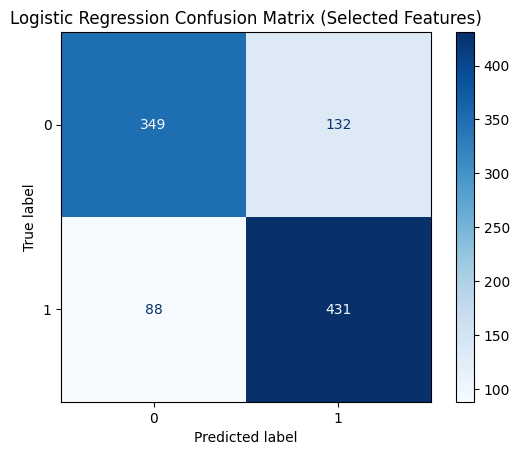


Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       481
           1       0.77      0.83      0.80       519

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

ROC-AUC (Selected Features): 0.8534644025973507


In [ ]:
log_reg, y_pred_log, y_prob_log = Logistic_Regression(x_train_selected, y_train, x_test_selected, y_test)

For Logistic Regression:

* We see that the Sensitivity ie, the recall for churners is 83% as of 519 actual churners, 431 were correctly identified

* We see that the Specificity ie, the recall for non-churners is 73% as of 481 non-churners, 349 were correctly identified.

* Finally we see that the Precision on churners is about 77% as 431/(431+132)

This balance highlights high true-positive rate with acceptable false positives and suits a retention campaign where catching most churners is critical.

In [ ]:
def display_coef_odds(log_reg):
# Variable impact (using selected features)
  importance = pd.DataFrame({
      'Feature': selected_features,
      'Coefficient': log_reg.coef_[0],
      'Odds_Ratio': np.exp(log_reg.coef_[0])
  }).sort_values(by='Odds_Ratio', ascending=False)
  print("\nCoefficient and Odds Ratio for Selected Features:\n"),
  display(importance)

  return importance

In [ ]:
importance = display_coef_odds(log_reg)


Coefficient and Odds Ratio for Selected Features:



,Feature,Coefficient,Odds_Ratio
11,ContractTenureCategory,0.984020,2.675189
8,TotalCharges,0.434871,1.544763
7,MonthlyCharges,0.387071,1.472661
2,PaperlessBilling,0.234333,1.264066
1,MultipleLines,0.180468,1.197778
9,ServiceCount,0.121881,1.129620
10,ServiceCount_Excluding_None,0.121881,1.129620
4,OnlineBackup,-0.162244,0.850234
3,OnlineSecurity,-0.266078,0.766379
5,TechSupport,-0.294677,0.744772


To understand why customers churn, we look at the feature importance.

In [ ]:
def plot_odds_ratios(importance):
  plt.figure(figsize=(10, 6))
  sns.barplot(
    data=importance.head(15),
    x="Odds_Ratio",
    y="Feature",
    palette="viridis"
  )
  plt.axvline(1, color="red", linestyle="--")  # Reference line at OR=1
  plt.title("Top Predictors of Churn (Odds Ratios)")
  plt.xlabel("Odds Ratio (exp(coefficient))")
  plt.ylabel("Feature")
  plt.tight_layout()
  plt.show()

  return

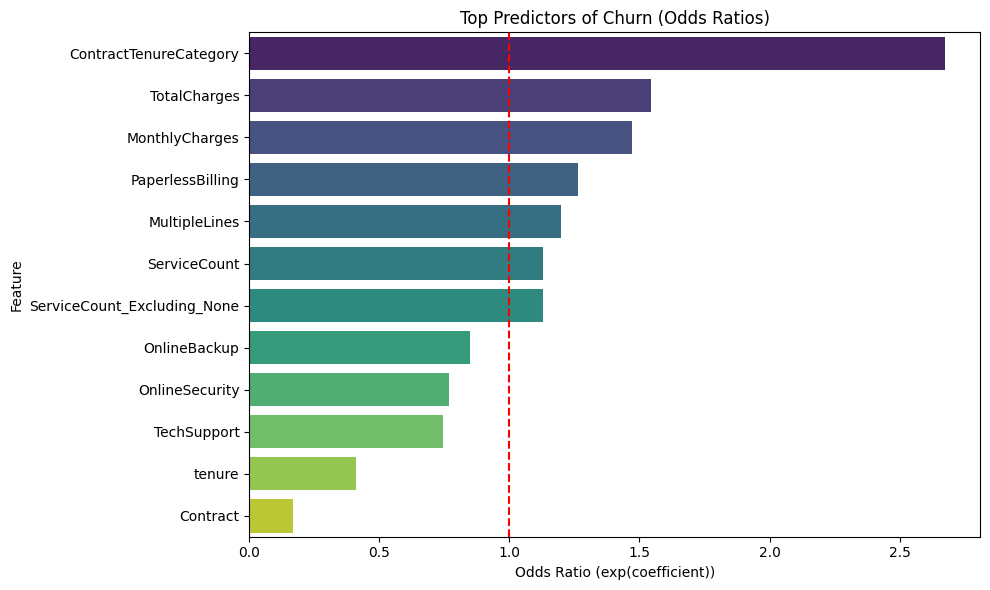

In [ ]:
plot_odds_ratios(importance)

##### **Logistic Regression Feature Importance (Odds Ratios)**

Top Factors that **INCREASE** the odds of a customer churning:

* **ContractTenureCategory (Odds Ratio: 2.68):** This was our strongest predictor. As we saw that being on a short-term tenure contract makes a customer more likely to leave.
* **TotalCharges & MonthlyCharges (Odds Ratios: 1.54 & 1.47):** As more a customer pays, both in total and per month, the higher are the chance they will churn.
* **PaperlessBilling (Odds Ratio: 1.26):** This signifies that customers on paperless billing are slightly more likely to churn.

Top Factors that **DECREASE** the odds of a customer churning (i.e., keep them loyal):

* **Contract (Odds Ratio: 0.17):** This is the most powerful factor for keeping customers. As being on a 1 year or 2 year contract makes customers less likely to leave when compared to a month-to-month plan.

* **tenure (Odds Ratio: 0.41):** As the longer someone has been a customer, the less likely they are to churn.

* **TechSupport, OnlineSecurity, & OnlineBackup (Odds Ratios: 0.74, 0.77, 0.85):** Customers who have extra services are less likely to leaves as it shows that value-added services help with their retention.

#### Linear Discriminant Analysis (LDA)

In [ ]:
def LDA_model(x_train_selected, y_train, x_test_selected, y_test):
    """Linear Discriminant Analysis Model"""

    print("\n" + "*"*50)
    print("LINEAR DISCRIMINANT ANALYSIS MODEL")
    print("*"*50)
    # Fit model using selected features
    lda = LDA()
    lda.fit(x_train_selected, y_train)

    # Predict using selected features
    y_pred_lda = lda.predict(x_test_selected)
    y_prob_lda = lda.predict_proba(x_test_selected)[:,1]

    # Evaluate
    print("LDA Accuracy (Selected Features):", accuracy_score(y_test, y_pred_lda))
    print("\nConfusion Matrix (Selected Features):\n", confusion_matrix(y_test, y_pred_lda))
    ConfusionMatrixDisplay.from_estimator(lda, x_test_selected, y_test, cmap="Blues")
    plt.title("LDA Confusion Matrix (Selected Features)")
    plt.show()
    print("\nClassification Report (Selected Features):\n", classification_report(y_test, y_pred_lda))
    print("ROC-AUC (Selected Features):", roc_auc_score(y_test, y_prob_lda,))
    return lda, y_pred_lda, y_prob_lda


**************************************************
LINEAR DISCRIMINANT ANALYSIS MODEL
**************************************************
LDA Accuracy (Selected Features): 0.778

Confusion Matrix (Selected Features):
 [[347 134]
 [ 88 431]]


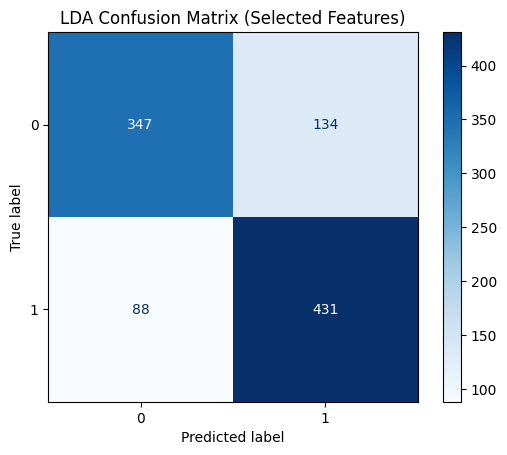


Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       481
           1       0.76      0.83      0.80       519

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

ROC-AUC (Selected Features): 0.8552109245750865


In [ ]:
lda, y_pred_lda, y_prob_lda = LDA_model(x_train_selected, y_train, x_test_selected, y_test)

For LDA:

* We see that the Sensitivity ie, the recall for churners is 83% as of 519 actual churners, 431 were correctly identified

* We see that the Specificity ie, the recall for non-churners is 72% as of 481 non-churners, 347 were correctly identified.

* Finally we see that the Precision on churners is about 76% as 431/(431+132)

This balance highlights high true-positive rate with acceptable false positives and suits a retention campaign where catching most churners is critical.

Thus we observe that the LDA model's results are almost identical.

In [ ]:
def display_lda_coef(lda):
  # Variable impact (using selected features)
  lda_importance = pd.DataFrame({
      'Feature': selected_features,
      'Coefficient': lda.coef_[0]
  }).sort_values(by='Coefficient', ascending=False)
  print("\nLDA Coefficient for Selected Features:\n"),
  display(lda_importance)
  return lda_importance

In [ ]:
lda_importance = display_lda_coef(lda)


LDA Coefficient for Selected Features:



,Feature,Coefficient
11,ContractTenureCategory,1.461483
7,MonthlyCharges,0.669741
2,PaperlessBilling,0.243279
1,MultipleLines,0.184507
10,ServiceCount_Excluding_None,0.076401
9,ServiceCount,0.076401
4,OnlineBackup,-0.165323
0,tenure,-0.193380
8,TotalCharges,-0.295747
3,OnlineSecurity,-0.306581


To understand why customers churn, we look at the feature importance.

In [ ]:
def plot_LDA_coef(lda_importance):
  plt.figure(figsize=(10, 6))
  sns.barplot(
      data=lda_importance.head(15),  # Top 15 features
      x="Coefficient",
      y="Feature",
      palette="coolwarm"
  )
  plt.axvline(0, color="black", linestyle="--")  # Reference line at 0
  plt.title("Top Predictors of Churn (LDA Coefficients)")
  plt.xlabel("Coefficient")
  plt.ylabel("Feature")
  plt.tight_layout()
  plt.show()
  return

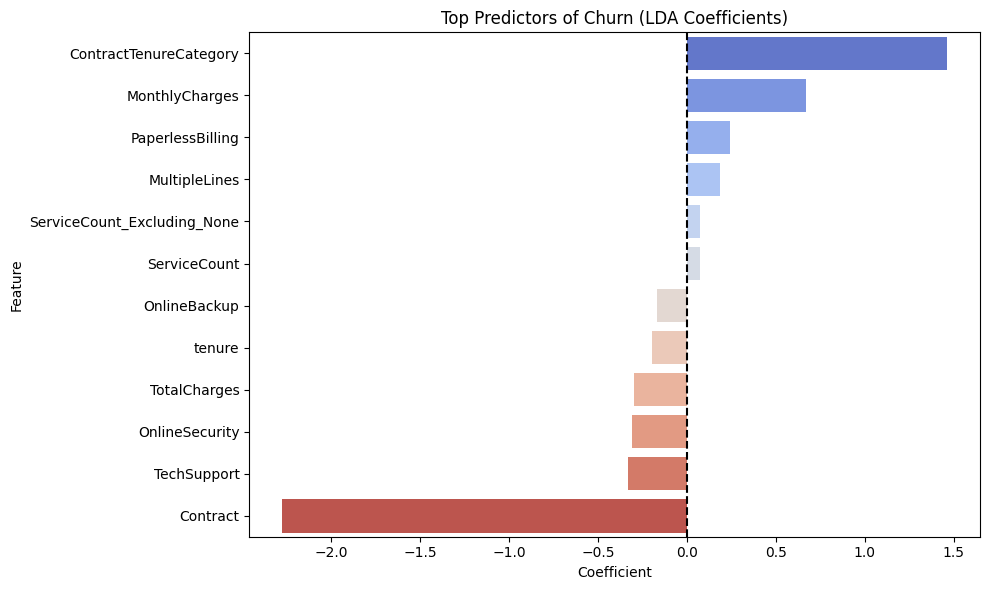

In [ ]:
plot_LDA_coef(lda_importance)

##### **LDA Feature Explanation**

LDA finds a linear combination of features that creates a single discriminant function to best separate the two classes (churn vs. no churn). The coefficients of this function represent the weight or importance of each feature in that separation.

A large coefficient for a feature indicates it is a powerful driver in distinguishing between churners and non-churners. The sign of the coefficient shows which direction the feature influences the separation. A positive coefficient pushes the score towards churn, while a negative one pushes it towards no churn.

The findings for LDA's top features align with those of Logistic Regression which imply that contract ContactTenureCategory, monthly charges and PaperlessBilling** are the most significant positive drivers of churn, while **contracts, TechSupport, OnlineSecurity and TotalCharges** services are the most powerful factors for customer retention.

#### ROC Curve Comparison

In [ ]:
def check_accuracy_roc(y_test, y_pred_log, y_prob_log, y_pred_lda, y_prob_lda):
  results = pd.DataFrame({
    "Model": ["Logistic Regression", "LDA"],
    "Accuracy": [accuracy_score(y_test, y_pred_log),
                 accuracy_score(y_test, y_pred_lda)],
    "ROC-AUC": [roc_auc_score(y_test, y_prob_log),
                roc_auc_score(y_test, y_prob_lda)]
})
  print("\nLDA and Logistic Regression Model Accuracy and ROC-AUC:\n")

  return results

In [ ]:
results = check_accuracy_roc(y_test, y_pred_log, y_prob_log, y_pred_lda, y_prob_lda)
display(results)


LDA and Logistic Regression Model Accuracy and ROC-AUC:



,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.780,0.853464
1,LDA,0.778,0.855211


Overall, both Logistic Regression And LDA models did a good job and gave us very similar results.

* **Accuracy Score**: The percentage of predictions the model got correct

    * **Logistic Regression Accuracy**: 78.0%
    * **LDA Accuracy**: 77.8%
    * Thus, both models are correct about 78% of the time.

* **ROC-AUC Score**: How well each model can distinguish between a customer who will churn and one who won't. A score of 1.0 is perfect prediction, and 0.5 is a random guess

    * **Logistic Regression ROC-AUC**: 0.853
    * **LDA ROC-AUC**: 0.855
    * Both scores are very high and close to each other which implies that the models have learned the patterns in the data well.

In [ ]:
def plot_roc_curve(y_test, y_prob_log, y_prob_lda):
  fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
  fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
  plt.figure(figsize=(8,6))
  plt.plot(fpr_log, tpr_log, label="Logistic Regression (Selected Features)")
  plt.plot(fpr_lda, tpr_lda, label="LDA (Selected Features)")
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve Comparison (Selected Features)")
  plt.legend()
  plt.show()
  return

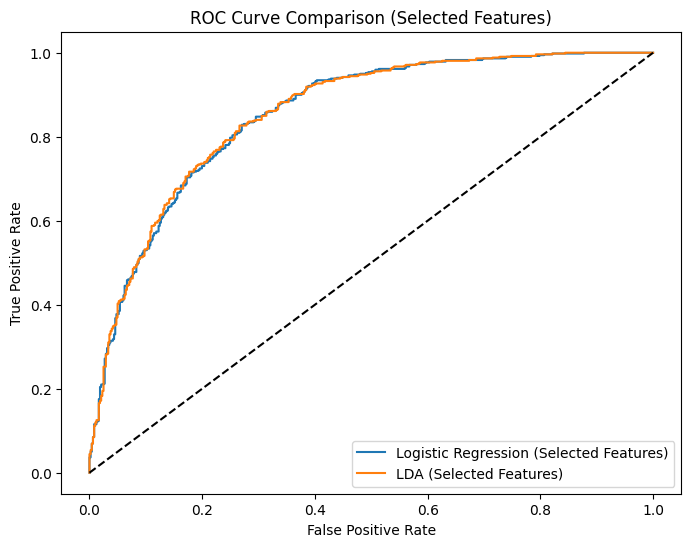

In [ ]:
plot_roc_curve(y_test, y_prob_log, y_prob_lda)

The ROC curves we plotted above also show that both the models have identified the patterns well and that the scores of both the models are almost right on top of each other.

In [ ]:
# Cross Validation Score (using selected features)
cv_scores = cross_val_score(log_reg, x_train_selected, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression CV ROC-AUC (Selected Features):", cv_scores.mean())

Logistic Regression CV ROC-AUC (Selected Features): 0.8436484278304066


Cross-validated AUC for Logistic Regression (5-fold) is 0.843, confirming stable out-of-sample performance.